In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [49]:
# Load the dataset
url = '/content/drive/MyDrive/DATAMPA/Sales Data Analysis.csv'
data = pd.read_csv(url)
data.head()

,Column1,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


In [50]:
# Sample Data
#data = data.sample(n=30000, random_state=42)

In [51]:
# Data Inspection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Column1           185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product Category  185950 non-null  object 
 3   Product           185950 non-null  object 
 4   Quantity Ordered  185950 non-null  int64  
 5   Price Each        185950 non-null  float64
 6   Order Date        185950 non-null  object 
 7   Purchase Address  185950 non-null  object 
 8   Month             185950 non-null  int64  
 9   Sales             185950 non-null  float64
 10  City              185950 non-null  object 
 11  Hour              185950 non-null  int64  
 12  Time of Day       185950 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 18.4+ MB


In [52]:
data.describe()

,Column1,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [53]:
# Mengecek missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
missing_values


Missing Values:


,0
Column1,0
Order ID,0
Product Category,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0


In [54]:
# Check unique values for each column to understand the nature of the data
for column in data:
    unique_vals = np.unique(data[column].fillna('0'))
    num_unique_vals = len(unique_vals)
    if num_unique_vals <= 12:
        print(f'The number of values for feature {column}: {num_unique_vals} -- {unique_vals}')
    else:
        print(f'The number of values for feature {column}: {num_unique_vals}')

The number of values for feature Column1: 25093
The number of values for feature Order ID: 178437
The number of values for feature Product Category: 8 -- ['Audio Devices' 'Batterie' 'Charging Cables' 'Entertainment Devices'
 'Home Appliances' 'Laptops and Computers' 'Monitors'
 'Phones and Accessories']
The number of values for feature Product: 19
The number of values for feature Quantity Ordered: 9 -- [1 2 3 4 5 6 7 8 9]
The number of values for feature Price Each: 17
The number of values for feature Order Date: 142395
The number of values for feature Purchase Address: 140787
The number of values for feature Month: 12 -- [ 1  2  3  4  5  6  7  8  9 10 11 12]
The number of values for feature Sales: 53
The number of values for feature City: 9 -- [' Atlanta' ' Austin' ' Boston' ' Dallas' ' Los Angeles' ' New York City'
 ' Portland' ' San Francisco' ' Seattle']
The number of values for feature Hour: 24
The number of values for feature Time of Day: 4 -- ['Afternoon' 'Evening' 'Morning' 'Ni

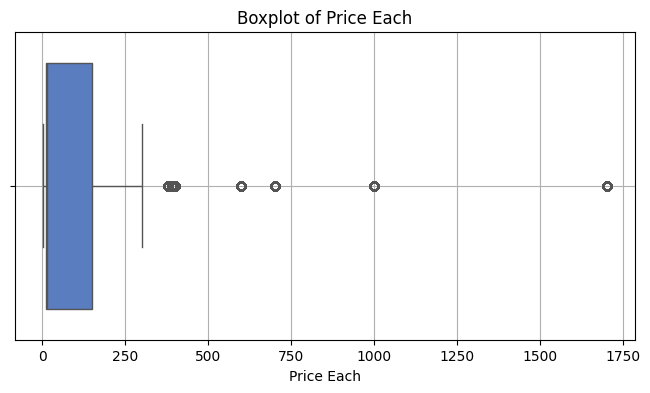

In [55]:
# Display the distribution of numeric data
numeric_columns = ['Price Each']
sns.set_palette("muted")

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.grid(True)
    plt.show()

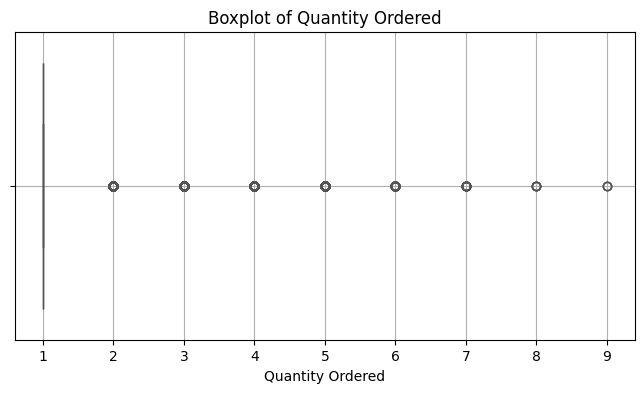

In [68]:
# Display the distribution of numeric data
numeric_columns = ['Quantity Ordered']
sns.set_palette("muted")

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.grid(True)
    plt.show()

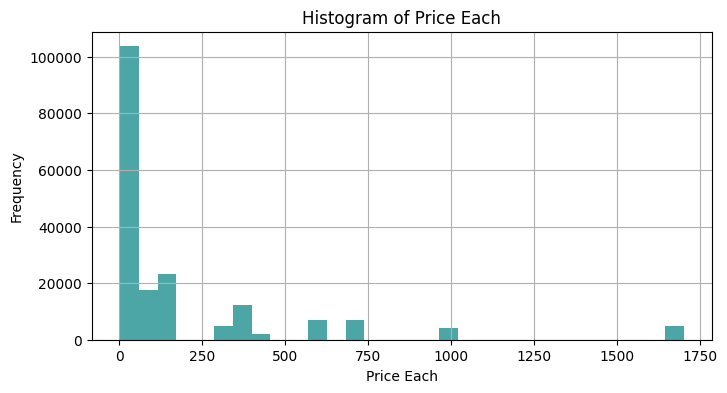

In [56]:
# Histogram for numeric variables
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[column], bins=30, color='teal', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

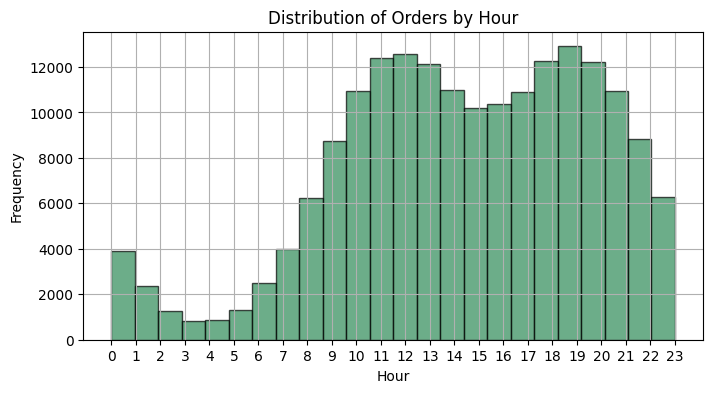

In [57]:
# Total penjualan berdasarkan waktu
plt.figure(figsize=(8, 4))
plt.hist(data['Hour'], bins=24, color='seagreen', alpha=0.7, edgecolor='black')
plt.title('Distribution of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


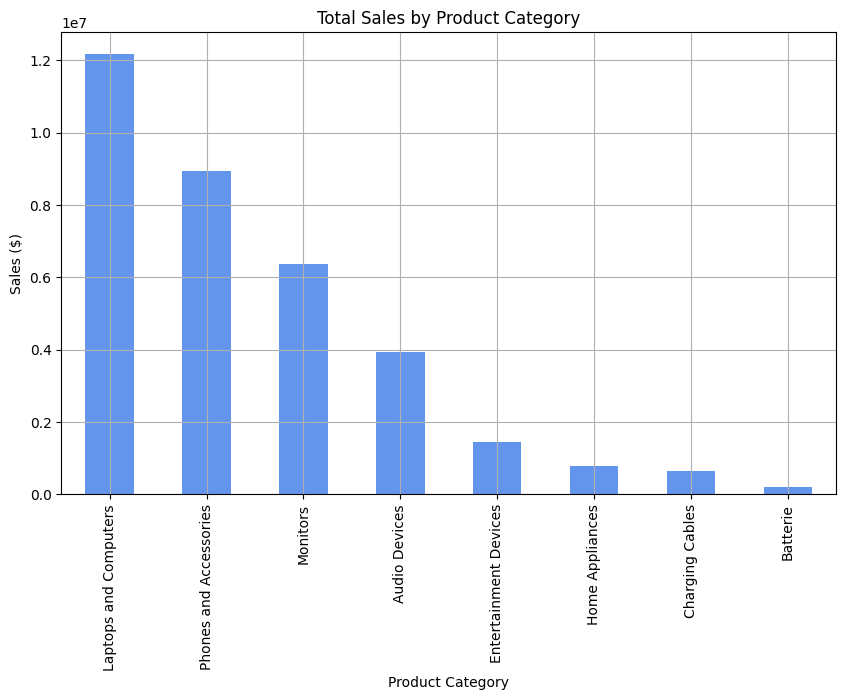

In [58]:
# Penjualan berdasarkan kategori produk
category_sales = data.groupby('Product Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(10, 6), color='cornflowerblue')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales ($)')
plt.xlabel('Product Category')
plt.grid(True)
plt.show()

In [59]:
# Data Cleaning
data.drop(columns=['Column1','Sales'], inplace=True)
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y %H:%M')
data['Hour'] = data['Order Date'].dt.hour
data['Month'] = data['Order Date'].dt.month
data['Time of Day'] = pd.cut(data['Hour'], bins=[0, 6, 12, 18, 24],
                             labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                             include_lowest=True)
data.drop_duplicates(inplace=True)
data['City'] = data['City'].str.strip()

In [60]:
data.head()

,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Time of Day
0,295665,Laptops and Computers,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,0,Night
1,295666,Home Appliances,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,7,Morning
2,295667,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,18,Afternoon
3,295668,Monitors,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,15,Afternoon
4,295669,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,12,Morning


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product Category  185686 non-null  object        
 2   Product           185686 non-null  object        
 3   Quantity Ordered  185686 non-null  int64         
 4   Price Each        185686 non-null  float64       
 5   Order Date        185686 non-null  datetime64[ns]
 6   Purchase Address  185686 non-null  object        
 7   Month             185686 non-null  int32         
 8   City              185686 non-null  object        
 9   Hour              185686 non-null  int32         
 10  Time of Day       185686 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int32(2), int64(2), object(4)
memory usage: 14.3+ MB


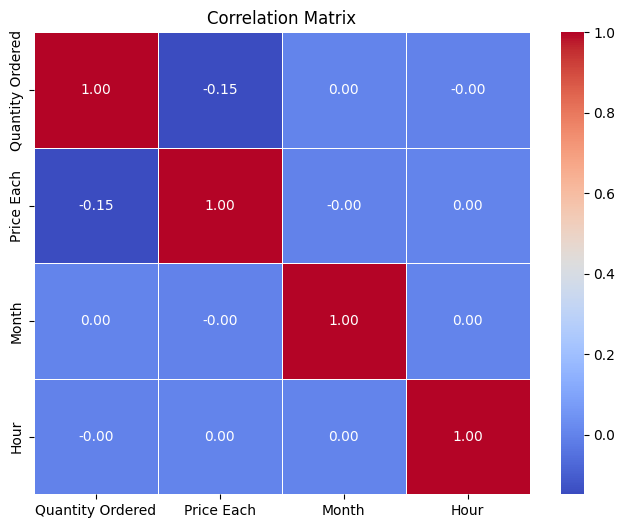

In [62]:
# Hitung korelasi hanya untuk kolom numerik
numeric_cols = ['Quantity Ordered', 'Price Each', 'Month', 'Hour']
correlation_matrix = data[numeric_cols].corr()

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [63]:
# Memilih kolom numerik
numeric_cols = ['Quantity Ordered', 'Price Each', 'Month', 'Hour']
data_numeric = data[numeric_cols]

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

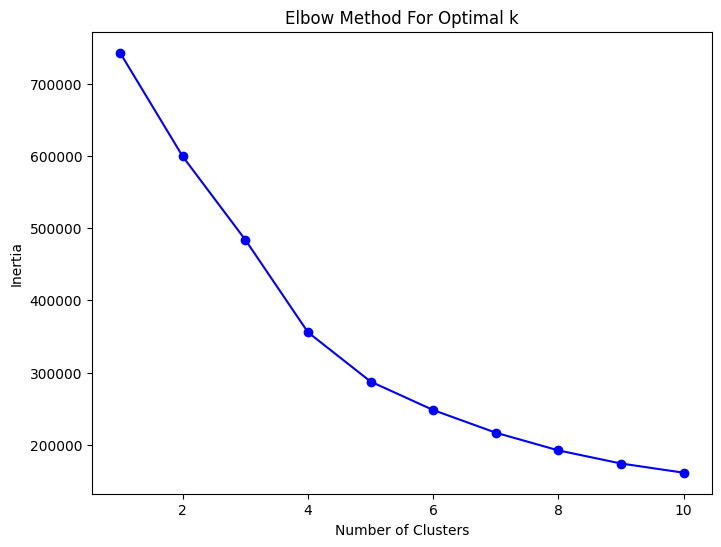

In [64]:
# Menghitung inersia untuk berbagai jumlah cluster
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
# Menentukan jumlah cluster optimal (misalnya k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Menambahkan label cluster ke data
data['Cluster'] = kmeans.labels_

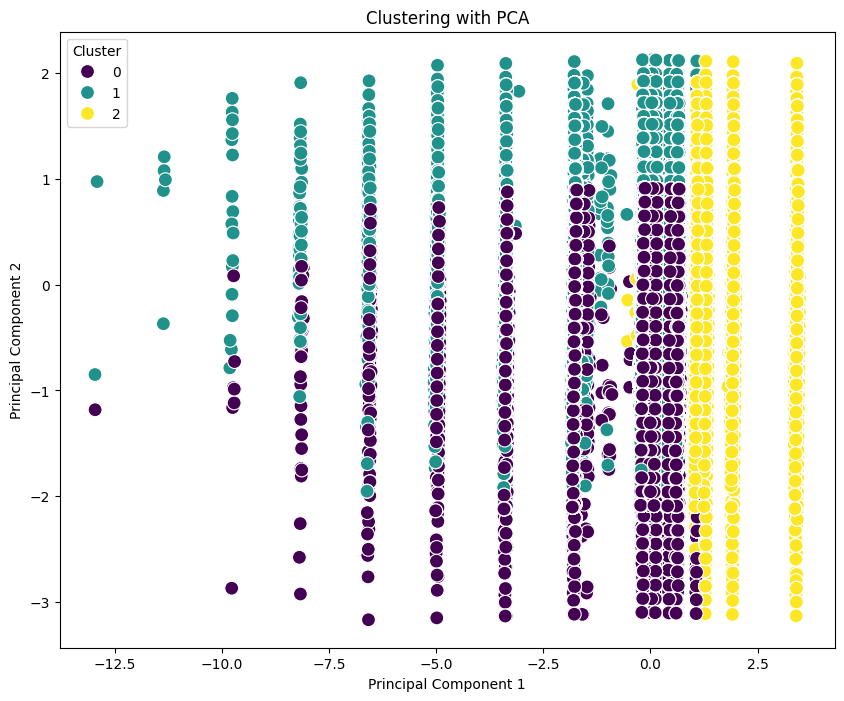

In [66]:
# Menerapkan PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Menambahkan komponen PCA ke data
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Visualisasi cluster dengan PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [67]:
# Analisis cluster
cluster_summary = data.groupby('Cluster')[numeric_cols].mean()
cluster_summary

,Quantity Ordered,Price Each,Month,Hour
Cluster,,,,
0,1.139265,91.071849,3.682386,14.398372
1,1.140001,85.922717,9.914519,14.418785
2,1.000742,972.480516,7.124153,14.441833
